In [1]:
%pylab notebook
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Read the file

In [2]:
df = pd.read_csv('../output/Skyscraper/5_Planning_Random/trips.log', sep=' ', index_col='clientID')
df.head()

,partySize,elevatorID,arrivalFloor,dropoffFloor,createTime,pickupTime,dropoffTime
clientID,,,,,,,
1,1,5,0,9,134,135,144
9,1,11,8,20,148,156,168
5,1,2,4,20,150,154,170
45,1,1,44,52,162,172,180
33,1,5,32,53,143,167,188


# Total number of clients per elevator

In [3]:
df['elevatorID'].value_counts().head()

0    1608
1    1522
Name: elevatorID, dtype: int64

<IPython.core.display.Javascript object>


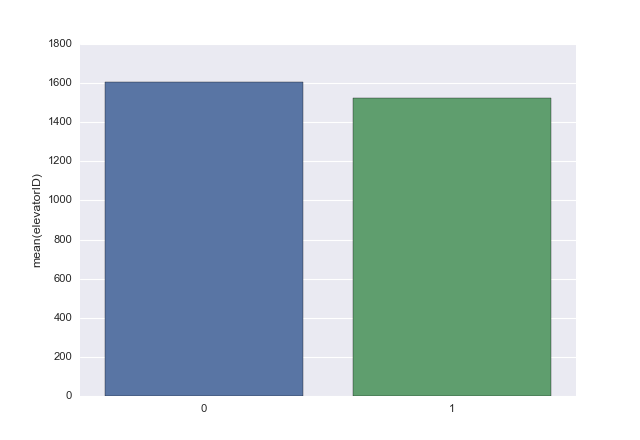

In [4]:
ax = sns.barplot(x=df.elevatorID.value_counts().index,
                 y=df.elevatorID.value_counts())

# Arrivals per floor (client creation)

In [5]:
df['arrivalFloor'].value_counts()

0     716
10    479
8     478
9     477
5     180
6     180
7     179
4     120
3     119
2     119
1      83
Name: arrivalFloor, dtype: int64

<IPython.core.display.Javascript object>


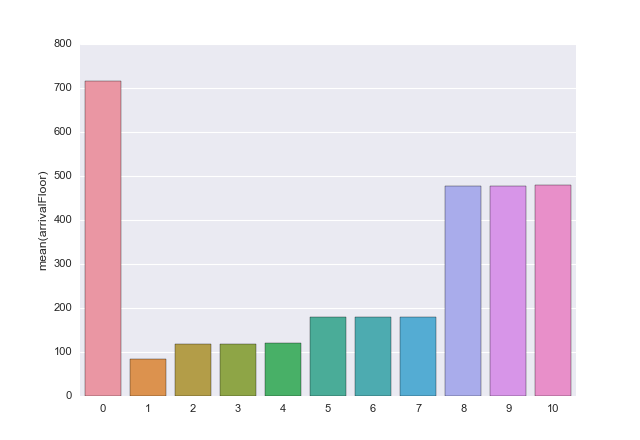

In [6]:
sns.barplot(x=df.arrivalFloor.value_counts().index,
            y=df.arrivalFloor.value_counts())

# Dropoffs per floor (client death)

In [7]:
df['dropoffFloor'].value_counts()

3     319
1     309
6     300
4     297
2     291
7     286
9     280
0     278
8     262
5     261
10    247
Name: dropoffFloor, dtype: int64

<IPython.core.display.Javascript object>


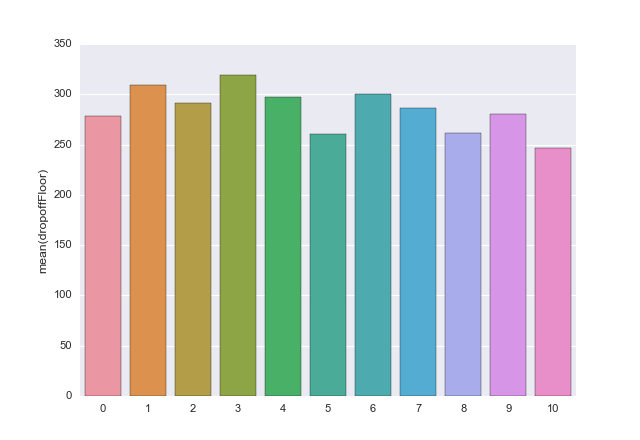

In [8]:
sns.barplot(x=df.dropoffFloor.value_counts().index,
            y=df.dropoffFloor.value_counts())

# Average wait time per floor

In [5]:
df['waitTime'] = df['pickupTime'] - df['createTime']
waits = df.groupby('arrivalFloor', as_index=False).aggregate(np.average)['waitTime']
waits = np.log10(waits)
waits.head()

0    3.003092
1    2.687679
2    2.645893
3    2.551416
4    2.562351
Name: waitTime, dtype: float64

<IPython.core.display.Javascript object>


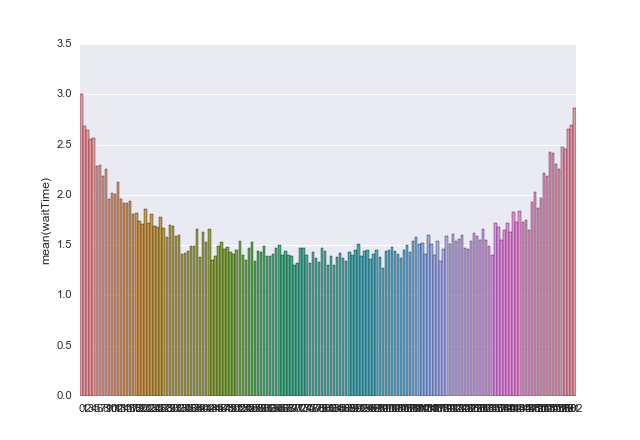

In [6]:
sns.barplot(x=waits.index,
            y=waits)

# Average travel time

## Get everyone's average travel time

Just figuring out how to aggregate and filter

In [10]:
df['travelTime'] = df['dropoffTime'] - df['pickupTime']
traveltimes = df.groupby('arrivalFloor', as_index=False).aggregate(np.average)['travelTime']
traveltimes.head()

0    7.773427
1    4.903614
2    3.831933
3    7.865546
4    4.600000
Name: travelTime, dtype: float64

<IPython.core.display.Javascript object>


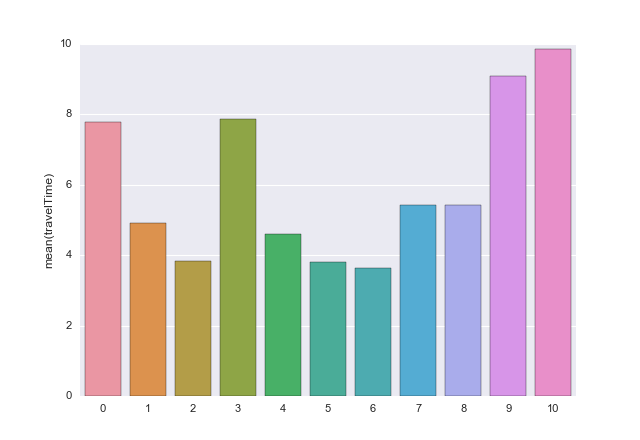

In [11]:
sns.barplot(x=traveltimes.index, y=traveltimes)

## Aggregate properly now

Group by both arrival and dropoff floor.

In [12]:
ttimes = df.groupby(['arrivalFloor', 'dropoffFloor']).aggregate(np.average)['travelTime']
ttimes.head()

arrivalFloor  dropoffFloor
0             1                1.000000
              2                2.000000
              3                3.000000
              4                4.000000
              5               20.893617
Name: travelTime, dtype: float64

Now plot the average travel time for people starting from the first floor

<IPython.core.display.Javascript object>


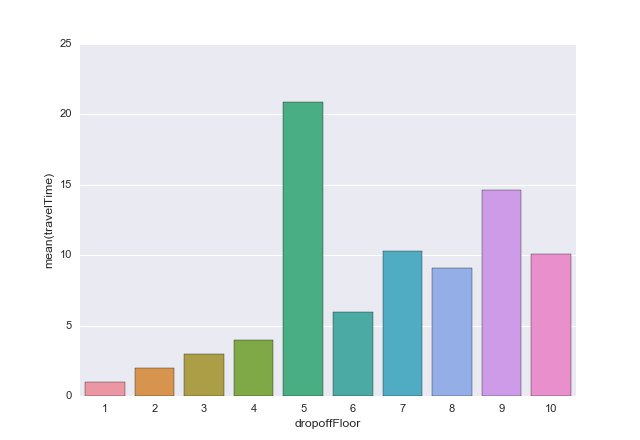

In [13]:
sns.barplot(x=ttimes[0].index, y=ttimes[0])

Plot the actual matrix, with everyone to everyone

<IPython.core.display.Javascript object>


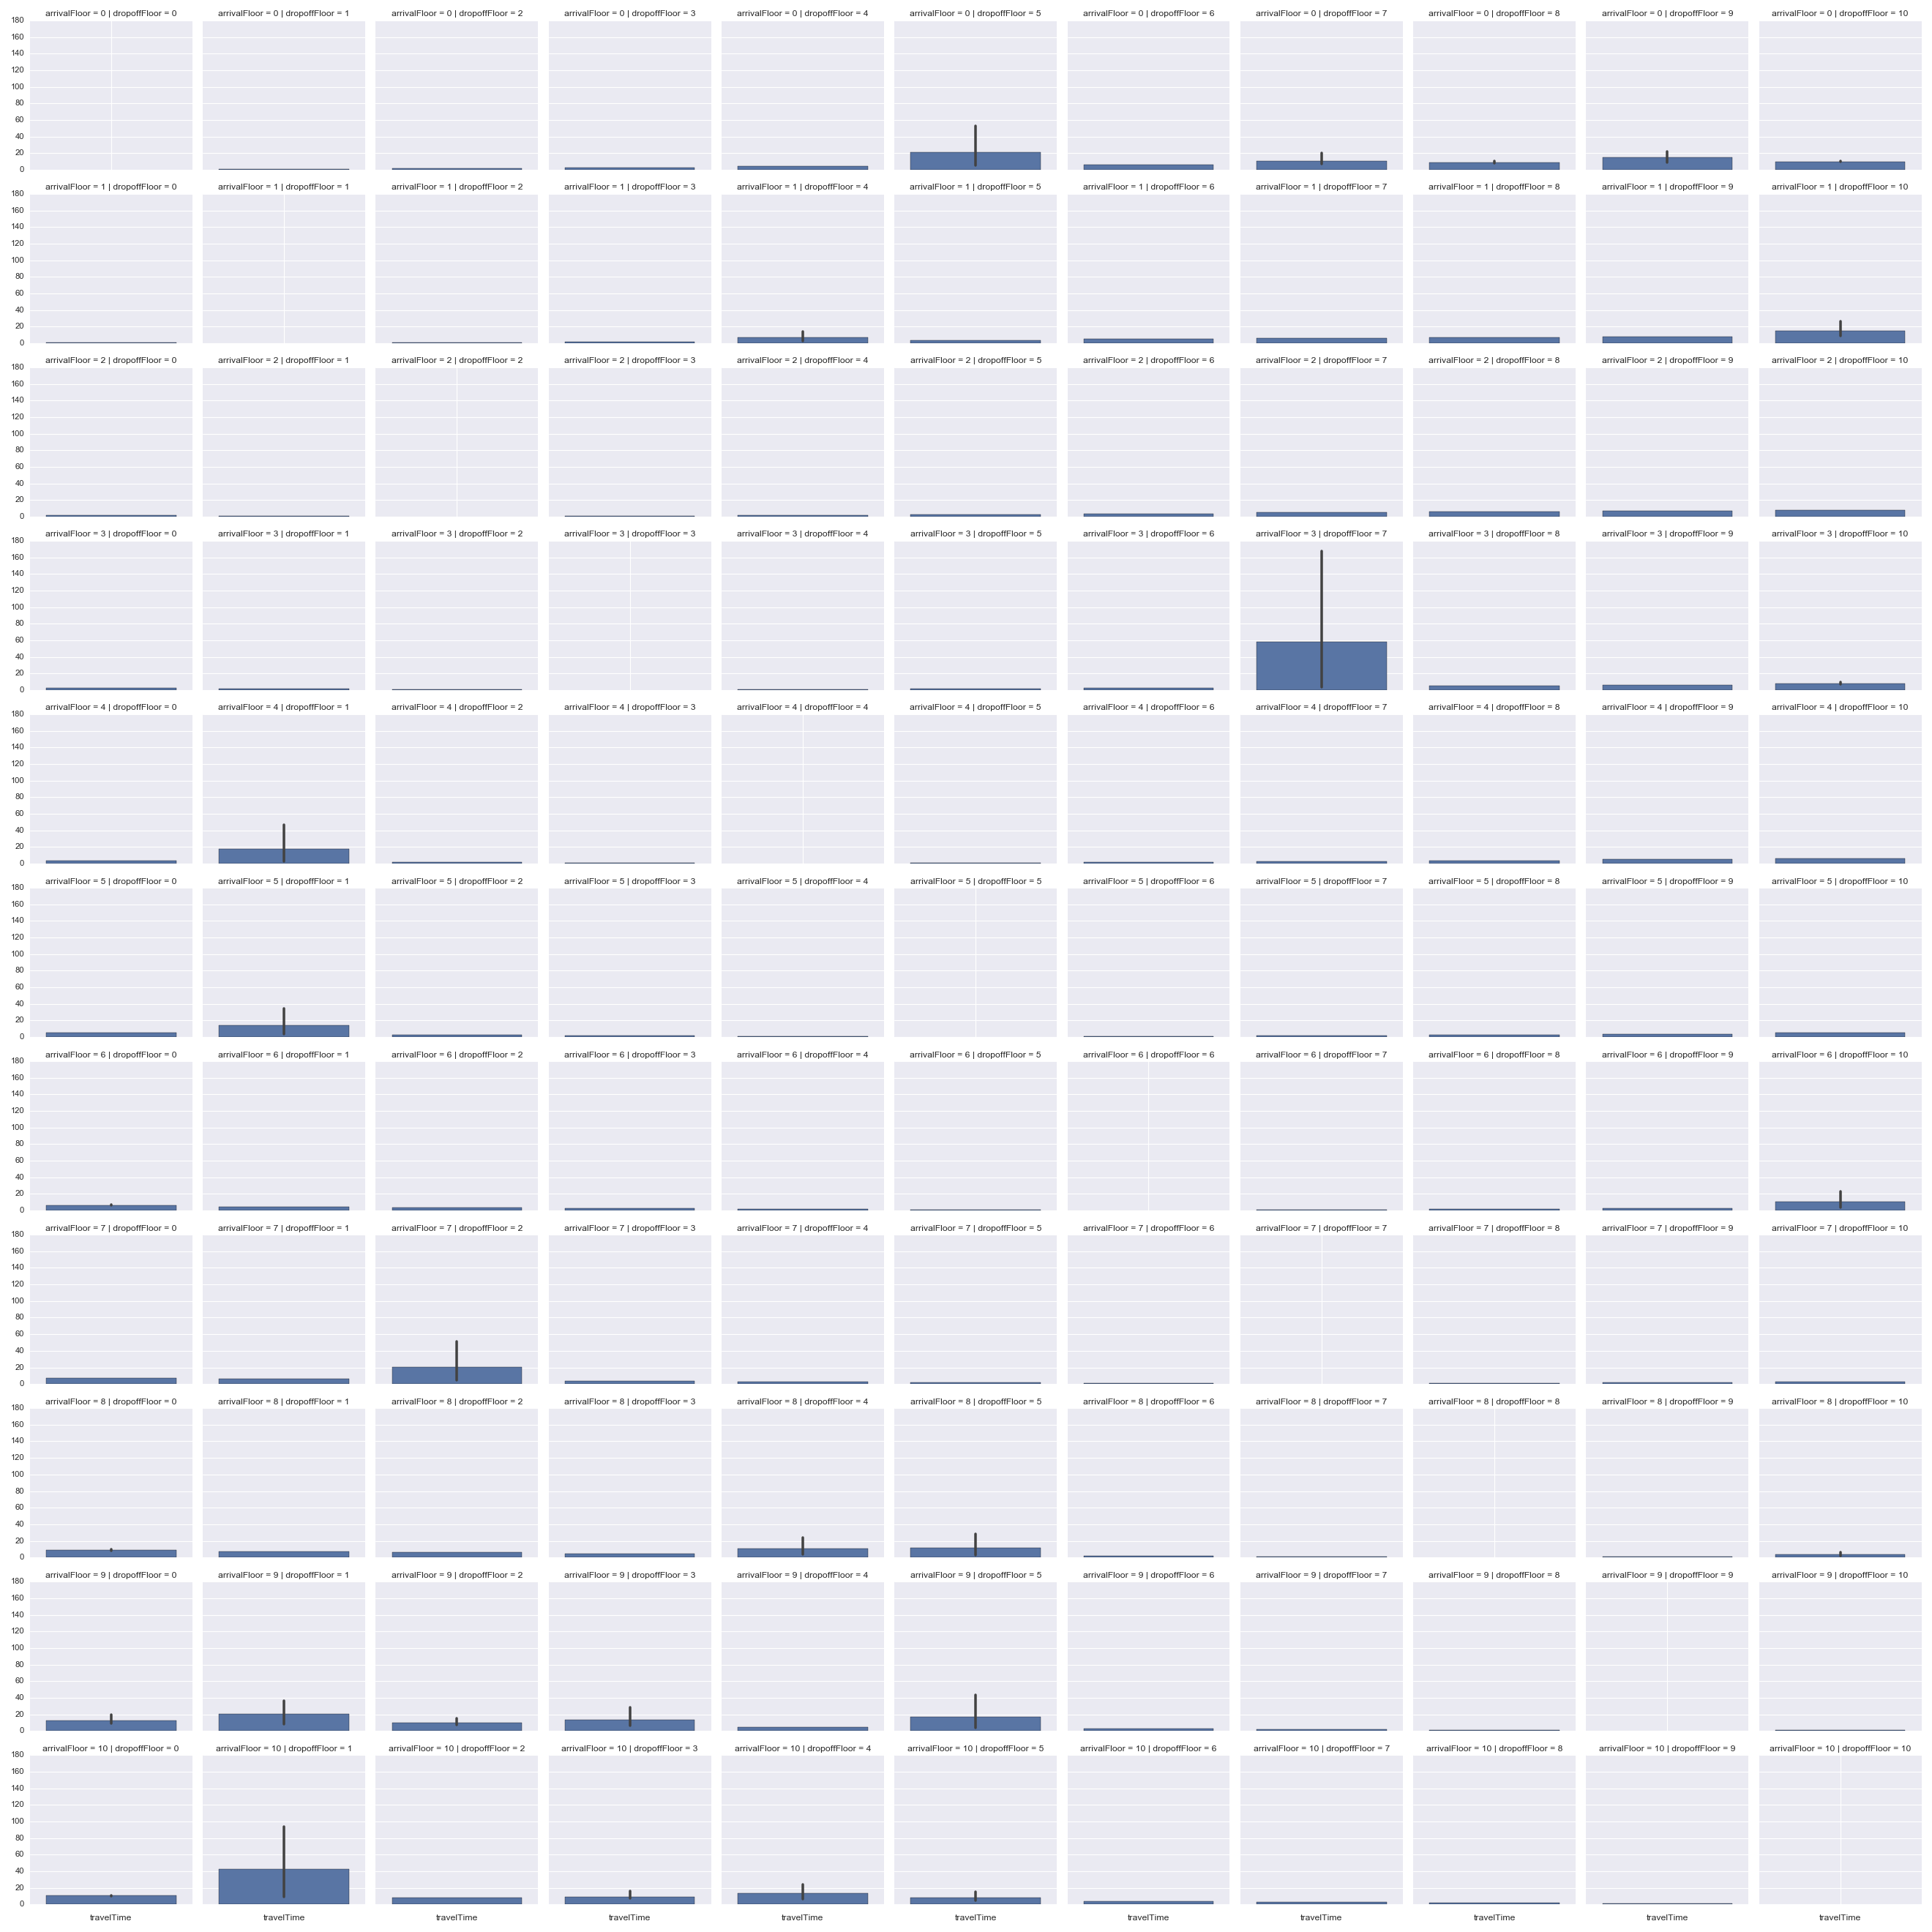

In [16]:
g = sns.FacetGrid(df, col="dropoffFloor", row="arrivalFloor")
g = g.map(sns.barplot, "travelTime", orient='v')